## 필요 라이브러리 불러오기

In [21]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from IPython.display import Image
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
%matplotlib inline

SEED = 34

## 데이터 불러오기

In [22]:
reuters = keras.datasets.reuters
(train_text, train_topic), (test_text, test_topic) = reuters.load_data()

In [23]:
# 데이터의 크기를 shape 함수를 통해 출력해주세요.
print(train_text.shape, train_topic.shape, test_text.shape, test_topic.shape)

(8982,) (8982,) (2246,) (2246,)


In [24]:
# train_text/topic의 dtype을 출력해보세요.
print(train_text.dtype, train_topic.dtype, test_text.dtype, test_topic.dtype)

object int64 object int64


Text(0.5, 1.0, 'text of length')

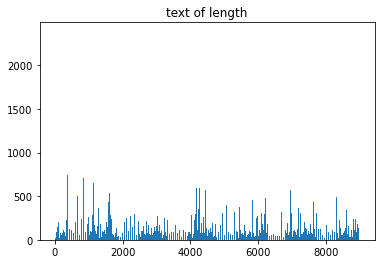

In [25]:
# train_text에서 각 원소의 길이를 y축으로 bar plot를 그려보세요.
plt.bar(range(len(train_text)), [len(text) for text in train_text])
plt.title('text of length')

In [27]:
# train_text, test_text에서 등장한 정수들을 알아보자
all_words = set([word for text in train_text for word in text]) | set([word for text in test_text for word in text])

In [28]:
print(sorted(all_words)[:5])
print(sorted(all_words)[-5:])

[1, 2, 4, 5, 6]
[30977, 30978, 30979, 30980, 30981]


In [33]:
train_bow_text = tf.keras.preprocessing.sequence.pad_sequences(train_text, value=0)
test_bow_text = tf.keras.preprocessing.sequence.pad_sequences(test_text, value=0)

In [37]:
train_bow_text.shape, test_bow_text.shape

((8982, 2376), (2246, 1032))

In [44]:
# train과 test에 나온 word들의 count를 측정해보자
import collections 

word_count = collections.Counter()

for text in train_text:
    word_count.update(text)
for text in test_text:
    word_count.update(text)
    
word_count.most_common(10)

[(4, 82723),
 (5, 42393),
 (6, 40350),
 (7, 33157),
 (8, 29978),
 (9, 29956),
 (10, 29581),
 (11, 20141),
 (12, 16668),
 (13, 15224)]

In [46]:
# word_count를 이용해서 n번 미만으로 나온 word를 삭제하여 train과 test를 구성하여보자.
def cut_by_count(texts, n):
    
    return np.array([[word for word in text if word_count[word] >= n] for text in texts])

In [55]:
train_cut_text = cut_by_count(train_text, 20)
test_cut_text = cut_by_count(test_text, 20)

In [57]:
train_cut_text.shape, test_cut_text.shape

((8982,), (2246,))

In [64]:
# train_text/test_text에 길이 제한을 줘서 bow를 생성해보세요.
train_cut_bow_text2 = tf.keras.preprocessing.sequence.pad_sequences(train_text, value = 0, maxlen = 200)
test_cut_bow_text2 = tf.keras.preprocessing.sequence.pad_sequences(test_text, value = 0, maxlen = 200)

In [65]:
train_cut_bow_text2.shape, test_cut_bow_text2.shape

((8982, 200), (2246, 200))

In [66]:
# topic을 onehot encoding으로 변경해보세요.
np.unique(train_topic)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [71]:
train_onehot_topic = keras.utils.to_categorical(train_topic)
test_onehot_topic = keras.utils.to_categorical(test_topic)

In [72]:
train_onehot_topic.shape, test_onehot_topic.shape

((8982, 46), (2246, 46))

In [73]:
#topic 인덱스를 text label로 변환하는 함수를 만드세요.
raw_labels = ['cocoa','grain','veg-oil','earn','acq','wheat','copper','housing','money-supply',
   'coffee','sugar','trade','reserves','ship','cotton','carcass','crude','nat-gas',
   'cpi','money-fx','interest','gnp','meal-feed','alum','oilseed','gold','tin',
   'strategic-metal','livestock','retail','ipi','iron-steel','rubber','heat','jobs',
   'lei','bop','zinc','orange','pet-chem','dlr','gas','silver','wpi','hog','lead']

In [80]:
len(raw_labels)

46

In [74]:
def topic2label(idx):
    return raw_labels[idx]

In [79]:
print(topic2label(0))
print(topic2label(45))

cocoa
lead


## 데이터 시각화

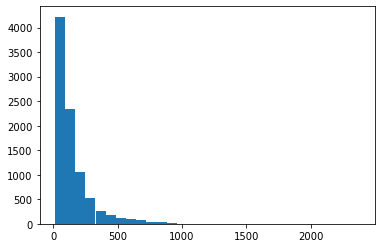

In [89]:
# train_text의 길이 분포를 출력해보세요.
plt.hist( [len(s) for s in train_text], bins = 30)
plt.show()

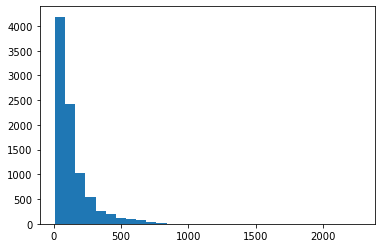

In [92]:
# train_cut_text의 길이 분포를 출력해보세요.
plt.hist( [len(s) for s in train_cut_text], bins = 30)
plt.show()

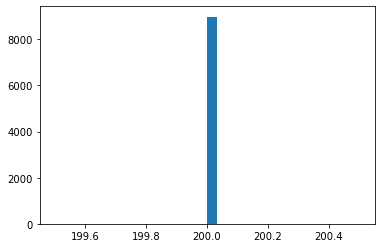

In [93]:
# train_cut_bow_text2의 길이 분포를 출력해보세요.
plt.hist( [len(s) for s in train_cut_bow_text2], bins = 30)
plt.show()

<BarContainer object of 46 artists>

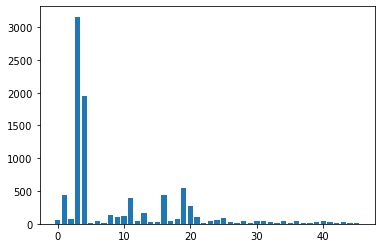

In [95]:
# label 분포를 출력해보세요.
plt.bar(np.unique(train_topic), list(map(lambda x:x[1], sorted(collections.Counter(train_topic).items()))))

<BarContainer object of 46 artists>

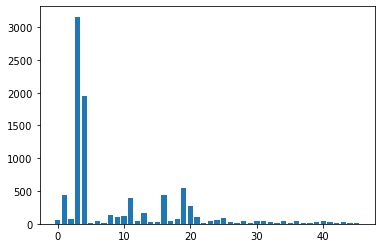

In [97]:
plt.bar(*np.unique(train_topic, return_counts=True))

<AxesSubplot:ylabel='count'>

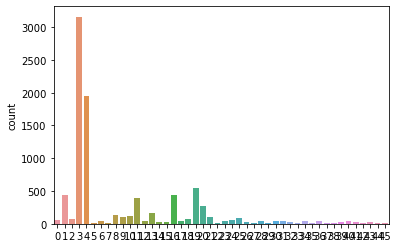

In [98]:
sns.countplot(train_topic)

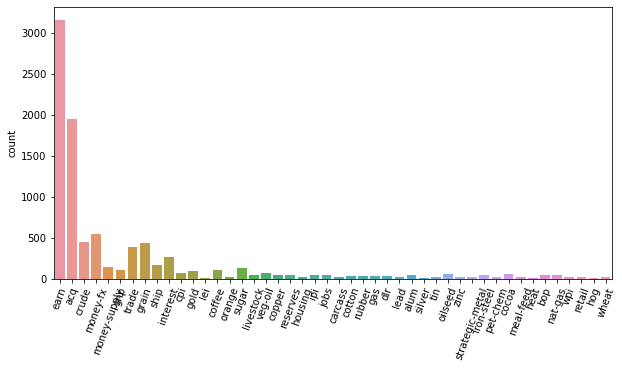

In [102]:
sns.countplot(list(map(lambda x: topic2label(x), train_topic)))
plt.xticks(rotation=70)
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

In [104]:
# reuters.get_word_index()를 이용해서 text를 decode해보세요.
index_word = { y:x for x, y in reuters.get_word_index().items()}

def bow2text(bow):
    return " ".join([index_word[idx] for idx in bow])

bow2text(test_text[1])

557056/550378 [==============================] - 0s 0us/step


"the slide both their a in after london adjusted 2 contracts 54 as sales agriculture with from were vs been prices its for benefit from dlrs vs been are 2 both 97 firms deficient i geneen briefly mln briefly week operating for giving 28 in record disappointed spending shr initiative around five farmers in but 18 66 5 efforts scale will t net mln with deal from billion vs been said in after london adjusted 5 will agip it take supplies briefly mln 9 confidence on been 5 will agriculture method it in has would both administration without on been it intended figures 3 total on been 5 will 75 that in into shares net mln january in three subject for system guaranty deficient users and 381 surviving in attempt 5 higher prices producers without on been 57 request in executive in three it at china concentrate as sales priorities paris said in attempt last told showed 1 and 48 deficit be what briefly mln surviving over qtr prices today is said acres agree in one news possible be 9 1988 vs region

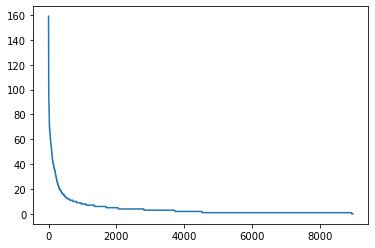

In [106]:
# 문서당 가장 많은 횟수로 출현한 word 분포를 출력하세요.
plt.plot(sorted([np.unique(doc, return_counts=True)[1].argmax() for doc in train_text], reverse=True))

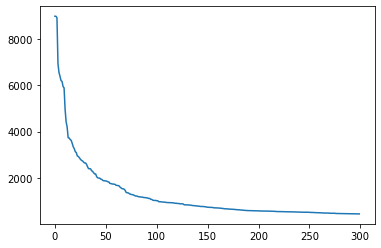

In [107]:
table = np.zeros(len(all_words)+2)
for doc in train_text:
    table[np.unique(doc)] +=1
plt.plot(sorted(table, reverse=True)[:300])

## 모델 만들기

In [108]:
from keras.layers import Input, Embedding, GRU, Dense
from keras.models import Model

In [116]:
def Seq2Seq():
    inputs_x_bow = Input(shape=(200, ))
    embedding = Embedding(len(index_word)+1, 120)
    x = embedding(inputs_x_bow)
    z = GRU(64)(x)
    y = Dense(46, activation='softmax')(z)
    
    model = Model(inputs_x_bow, y)
    model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
    return model

In [117]:
model = Seq2Seq()
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 200)]             0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 200, 120)          3717600   
_________________________________________________________________
gru_2 (GRU)                  (None, 64)                35712     
_________________________________________________________________
dense_2 (Dense)              (None, 46)                2990      
Total params: 3,756,302
Trainable params: 3,756,302
Non-trainable params: 0
_________________________________________________________________


In [118]:
hist = model.fit(
    train_cut_bow_text2,
    train_onehot_topic,
    validation_data = (test_cut_bow_text2, test_onehot_topic),
    verbose = 1,
    epochs = 20
)

Epoch 1/20
281/281 [==============================] - 26s 88ms/step - loss: 2.6046 - accuracy: 0.3569 - val_loss: 1.8308 - val_accuracy: 0.5254
Epoch 2/20
281/281 [==============================] - 24s 85ms/step - loss: 1.7048 - accuracy: 0.5431 - val_loss: 1.7173 - val_accuracy: 0.5801
Epoch 3/20
281/281 [==============================] - 24s 87ms/step - loss: 1.5026 - accuracy: 0.6116 - val_loss: 1.6448 - val_accuracy: 0.5855
Epoch 4/20
281/281 [==============================] - 24s 86ms/step - loss: 1.3376 - accuracy: 0.6538 - val_loss: 1.5905 - val_accuracy: 0.6011
Epoch 5/20
281/281 [==============================] - 24s 87ms/step - loss: 1.2183 - accuracy: 0.6836 - val_loss: 1.5919 - val_accuracy: 0.6082
Epoch 6/20
281/281 [==============================] - 25s 88ms/step - loss: 1.0586 - accuracy: 0.7341 - val_loss: 1.5682 - val_accuracy: 0.6215
Epoch 7/20
281/281 [==============================] - 25s 90ms/step - loss: 0.9324 - accuracy: 0.7599 - val_loss: 1.5394 - val_accuracy:

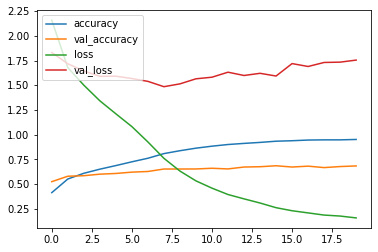

In [119]:
# hist의 accuracy와 loss를 plt의 plot을 이용하여 출력하는 코드를 작성하세요.
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend(loc="upper left")
plt.show()

In [120]:
# 완성된 모델에서 test 하나를 예측하고 결과를 res 변수에 저정하세요.
res = model.predict(test_cut_bow_text2[1:2])
res, res.shape

(array([[2.5646167e-04, 1.8520406e-02, 6.8457077e-05, 9.3604373e-05,
         1.3717936e-03, 8.6062485e-03, 6.3338876e-03, 7.4226518e-05,
         1.9298730e-07, 6.1907572e-06, 8.9646810e-01, 2.1856840e-05,
         7.0666384e-09, 9.2155760e-06, 1.1210800e-03, 1.5486485e-03,
         6.3533524e-05, 3.2005730e-05, 1.2293211e-06, 2.7422345e-06,
         9.2373000e-08, 5.3626150e-07, 3.8398875e-04, 7.4440724e-04,
         2.9670242e-05, 7.0637022e-03, 2.1582279e-02, 2.7770966e-03,
         4.1265402e-04, 1.1505428e-05, 2.6479170e-06, 1.0316391e-02,
         7.7433819e-05, 3.7299634e-03, 5.6205619e-07, 2.4234457e-04,
         9.5125847e-07, 3.2481286e-04, 1.3315878e-02, 7.9718237e-05,
         1.4724924e-06, 1.3954753e-04, 3.4887069e-03, 2.1766789e-05,
         5.2716752e-04, 1.2475792e-04]], dtype=float32),
 (1, 46))

<BarContainer object of 46 artists>

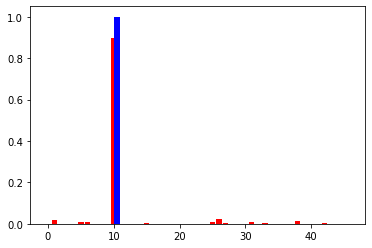

In [122]:
plt.bar( np.array(range(len(res[0]))), res[0], color='red')
plt.bar( np.array(range(len(res[0]))) + 0.5, test_onehot_topic[1], color='blue')

In [123]:
topic2label(test_onehot_topic[1].argmax())

'sugar'

<BarContainer object of 46 artists>

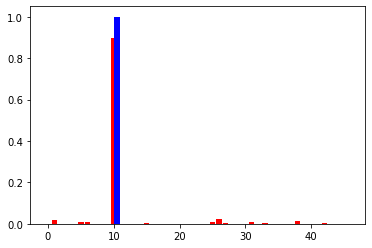

In [124]:
wrong1 = model.predict(test_cut_bow_text2[1:2, -200:])
plt.bar( np.array(range(len(wrong1[0]))), wrong1[0], color='red')
plt.bar( np.array(range(len(wrong1[0]))) + 0.5, test_onehot_topic[1], color='blue')

In [125]:
text = bow2text(test_text[0])
text

'the in wants intermediate 3 how types could mln at against 2 guidelines vs end products opec he will will along results and willingly exports 3 purchased each it stubbornly profit 3 avondale profit agreement in around corp should for 3 cannot mln in ended said avondale a 54 but 3 stubbornly a only generally political primarily date other under well a in british rate gain if demand at an div its taking report montreal systems were is and production had vs 000 7 issued year for 0 a in buffer rate loss may results tariffs dlrs is and from 39 s 000 for 3 cannot pre 50 east that in foods products opec last 1 fall change 1 approval in 15 2 said in opec 28 but for 3 cannot cts systems which is half be 6 iffezheim uobm said president amount pct dlrs'

In [126]:
# reuters.get_word_index()를 이용하여 평문을 bow로 변환해보세요. (oov는 무시합니다.)
def text2bow(text, maxlen = 400):
    word_index = reuters.get_word_index()
    seq = np.array([word_index[word] for word in text.lower().replace("\n", " ").split() if word in word])
    bow = tf.keras.preprocessing.sequence.pad_sequences([seq], value = 0, maxlen = maxlen)
    return bow

In [127]:
bow = text2bow(text)
bow.shape

(1, 400)

<BarContainer object of 46 artists>

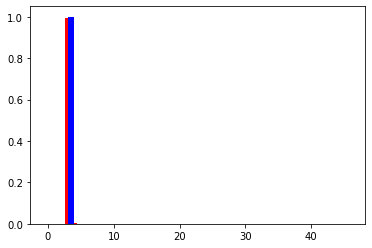

In [130]:
# text2bow를 이용하여 model1을 통해 결과를 확인하세요.
res1 = model.predict(bow[..., -200:])
plt.bar(np.array(range(len(res1[0]))), res1[0], color='red')
plt.bar( np.array(range(len(res1[0]))) + 0.5, test_onehot_topic[0], color='blue')

In [133]:
from sklearn.metrics import confusion_matrix

conf_mat1 = confusion_matrix(test_onehot_topic.argmax(axis=1), model.predict(test_cut_bow_text2).argmax(axis=1))
print(conf_mat1), conf_mat1.shape

[[ 7  1  0 ...  0  0  0]
 [ 1 84  0 ...  0  0  0]
 [ 0  2  7 ...  0  0  0]
 ...
 [ 0  0  0 ...  5  0  0]
 [ 0  0  0 ...  0  4  0]
 [ 0  0  0 ...  0  0  0]]


(None, (46, 46))

<AxesSubplot:>

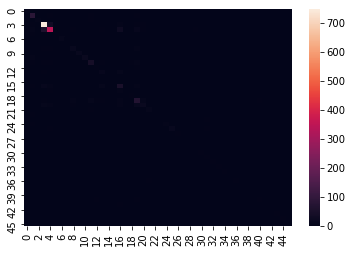

In [134]:
sns.heatmap(conf_mat1)

<AxesSubplot:>

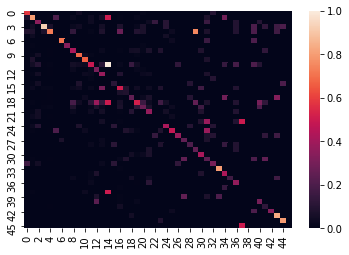

In [135]:
sns.heatmap(conf_mat1 / conf_mat1.sum(axis=1))

In [136]:
# classification 결과 리포팅
from sklearn.metrics import classification_report
print( classification_report(test_onehot_topic.argmax(axis=1), model.predict(test_cut_bow_text2).argmax(axis=1), target_names=raw_labels) )

                 precision    recall  f1-score   support

          cocoa       0.64      0.58      0.61        12
          grain       0.62      0.80      0.70       105
        veg-oil       0.41      0.35      0.38        20
           earn       0.88      0.92      0.90       813
            acq       0.81      0.73      0.77       474
          wheat       0.00      0.00      0.00         5
         copper       0.91      0.71      0.80        14
        housing       1.00      0.33      0.50         3
   money-supply       0.41      0.42      0.42        38
         coffee       0.65      0.68      0.67        25
          sugar       0.77      0.67      0.71        30
          trade       0.55      0.49      0.52        83
       reserves       0.27      0.31      0.29        13
           ship       0.28      0.38      0.32        37
         cotton       0.00      0.00      0.00         2
        carcass       0.25      0.11      0.15         9
          crude       0.38    

In [137]:
model.save('./newspaper.h5')

In [138]:
loss, acc = model.evaluate(test_cut_bow_text2, test_onehot_topic, verbose=1)
print(loss, acc)

71/71 [==============================] - 1s 11ms/step - loss: 1.7546 - accuracy: 0.6843
1.7545636892318726 0.6843277215957642
